In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import Model

In [2]:
np.set_printoptions(threshold=np.inf)
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Epoch 1/5
1563/1563 [==============================] - 413s 264ms/step - loss: 1.8421 - sparse_categorical_accuracy: 0.3153 - val_loss: 1.6085 - val_sparse_categorical_accuracy: 0.4145
Epoch 2/5
1563/1563 [==============================] - 414s 265ms/step - loss: 1.3369 - sparse_categorical_accuracy: 0.5207 - val_loss: 1.2535 - val_sparse_categorical_accuracy: 0.5556
Epoch 3/5
1563/1563 [==============================] - 413s 264ms/step - loss: 1.1983 - sparse_categorical_accuracy: 0.5844 - val_loss: 1.4542 - val_sparse_categorical_accuracy: 0.5037
Epoch 4/5
1563/1563 [==============================] - 412s 264ms/step - loss: 1.0909 - sparse_categorical_accuracy: 0.6222 - val_loss: 1.2907 - val_sparse_categorical_accuracy: 0.5562
Epoch 5/5
1563/1563 [==============================] - 431s 275ms/step - loss: 1.0138 - sparse_categorical_accuracy: 0.6527 - val_loss: 1.1344 - val_sparse_categorical_accuracy: 0.6079
Model: "alex_net8_3"
______________________________________________________

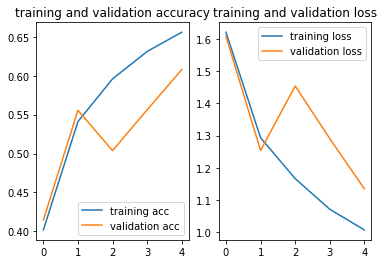

In [8]:
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = tf.keras.layers.BatchNormalization()
        self.a1 = tf.keras.layers.Activation('relu')
        self.p1 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides= 2)
        
        self.c2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = tf.keras.layers.BatchNormalization()
        self.a2 = tf.keras.layers.Activation('relu')
        self.p2 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2)
        
        self.c3 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding = 'same',
                                        activation='relu')
        self.c4 = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding = 'same',
                                        activation='relu')
        self.c5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding = 'same',
                                        activation='relu')
        self.p3 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=2)
        
        self.f1 = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(2048, activation = 'relu')
        self.d1 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(2048, activation = 'relu')
        self.d2 = tf.keras.layers.Dropout(0.5)
        self.dense3 = tf.keras.layers.Dense(10, activation = 'softmax')
        
    def call(self,x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        
        x = self.c3(x)
        x = self.c4(x)
        x = self.c5(x)
        
        x = self.p3(x)
        
        x = self.f1(x)
        
        x =self.dense(x)
        x = self.d1(x)
        x = self.dense2(x)
        x = self.d2(x)
        y =self.dense3(x)
        
        return y
    
model = AlexNet8()
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model_savepath = "./alexnet8_checkpoint/alexnet8.ckpt"
if os.path.exists(model_savepath + '.index'):
    print("--------------------load model---------------------")
    model.load_weights(filepath=model_savepath)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_savepath,
                                                save_weights_only=True,
                                                save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                   callbacks=[cp_callback])

model.summary()

with open("alexnet_weights.txt", 'w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy)+'\n')
        
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc, label='training acc')
plt.plot(val_acc, label='validation acc')
plt.title("training and validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title("training and validation loss")
plt.legend()
plt.show()